* 完成後請寄到EMAIL : clement.class.02@gmail.com
* 信件主旨請設定為： 05-04.LAB_Titanic_學號_姓名  (例: "05-04.LAB_Titanic_00_陳仁政")
* 附件檔名請設定為： 05-04.LAB_Titanic_學號_姓名.ipynb (例: "05-04.LAB_Titanic_00_陳仁政.ipynb")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

sns.set_style('whitegrid') #注意！set_style會蓋過matplotlib的中文字型設定，所以要先執行
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 或者 'SimHei' 'JhengHei'等
matplotlib.rcParams['axes.unicode_minus'] = False  # 顯示負號

data = pd.read_csv("../data/Titanic.csv")
data.head(10)

,乘客序號,船票等級,姓名,性別,年紀,旁系親屬數目,直系親屬數目,船票編號,船票價格,船艙號碼,出發港口,是否倖存
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


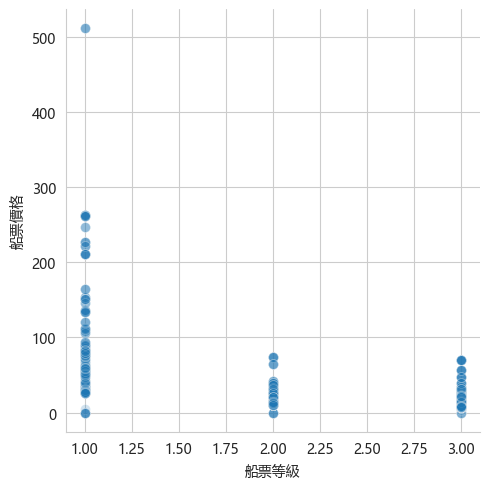

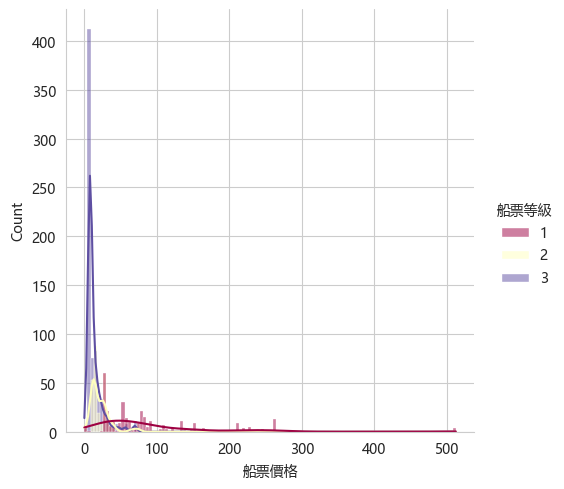

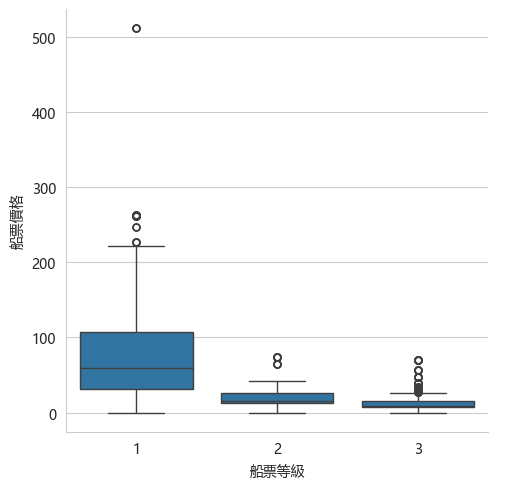

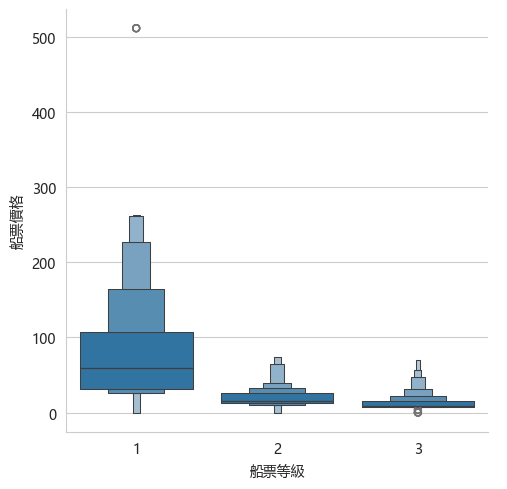

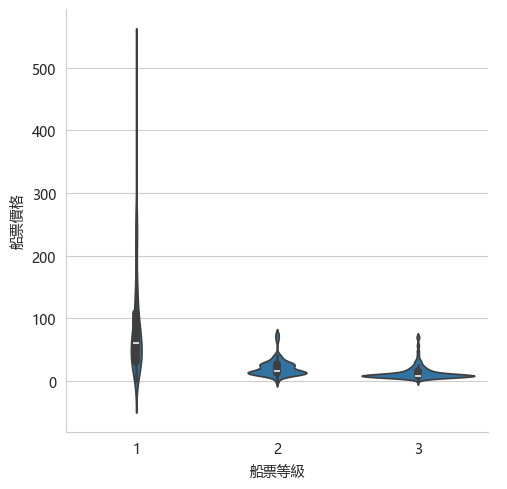

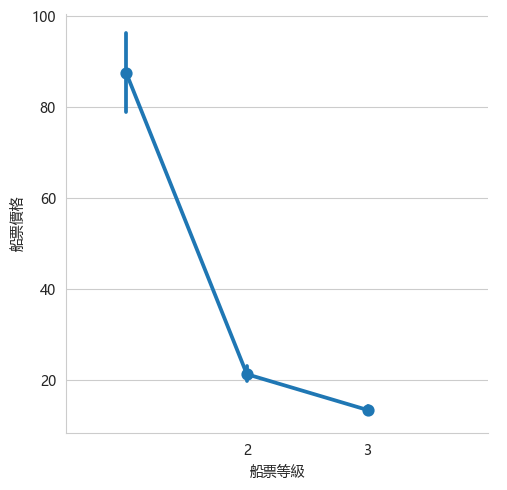

In [29]:
# 用圖來找出 船票等級 跟 船票價格 的關係
sns.relplot(data,x='船票等級',y='船票價格', alpha=0.2, s=50) #方法1
# sns.catplot(data, x="船票等級", y="船票價格", kind="swarm") #方法2, 資料點太多，不合適
sns.displot(data, x="船票價格", hue="船票等級", kde=True, palette="Spectral") #方法3
sns.catplot(data, x="船票等級", y="船票價格", kind="box") #方法4
sns.catplot(data, x="船票等級", y="船票價格", kind="boxen") #方法5
sns.catplot(data, x="船票等級", y="船票價格", kind="violin") #方法6
sns.catplot(data, x="船票等級", y="船票價格", kind="point") #方法7

plt.xticks([1, 2, 3])
plt.show()

↑ 問題：上面幾種不同的圖，哪個圖比較容易看出來？

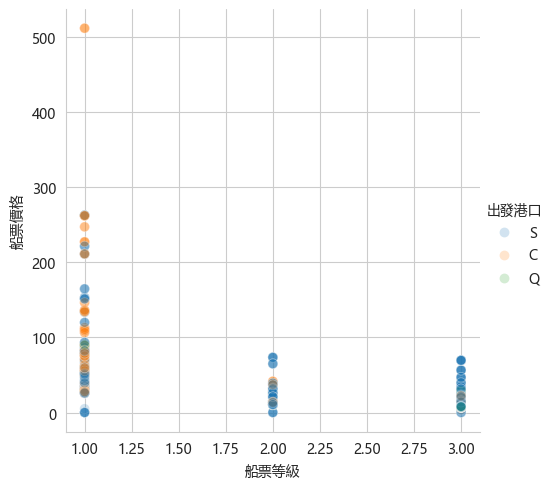

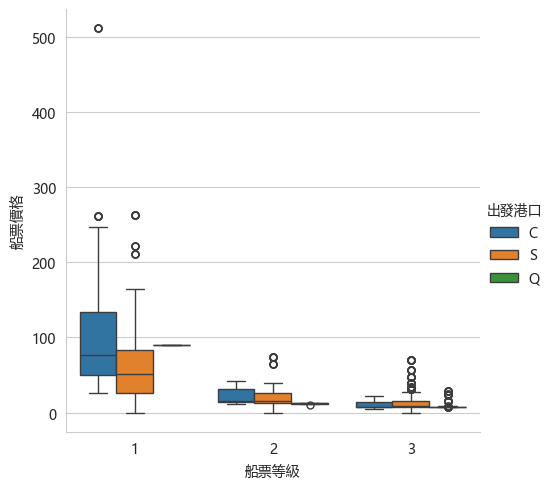

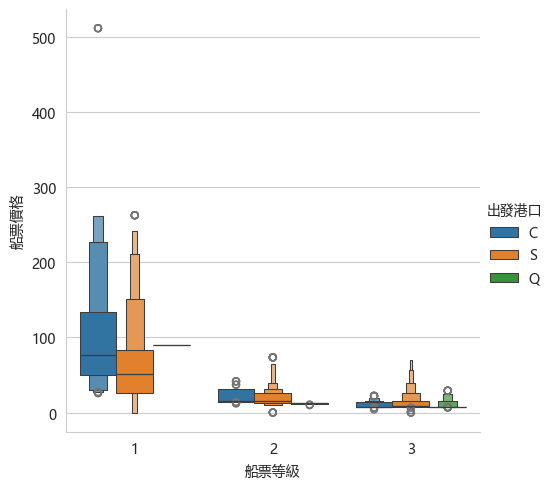

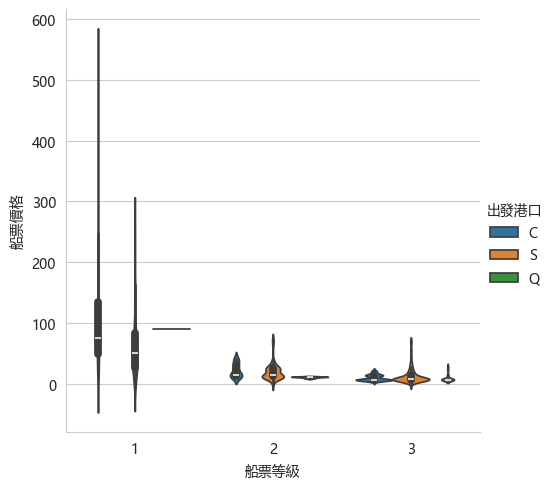

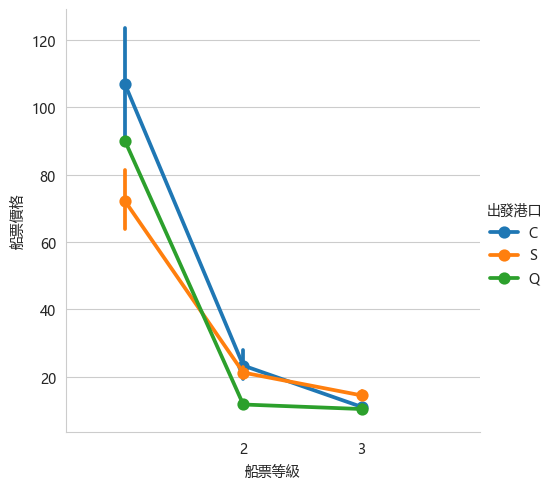

In [32]:
# 找出 出發港口 跟 船票等級 是否會影響 船票價格
sns.relplot(data,x='船票等級',y='船票價格', alpha=0.2, s=50, hue='出發港口') #方法1
sns.catplot(data, x="船票等級", y="船票價格", kind="box", hue='出發港口') #方法2
sns.catplot(data, x="船票等級", y="船票價格", kind="boxen", hue='出發港口') #方法3
sns.catplot(data, x="船票等級", y="船票價格", kind="violin", hue='出發港口') #方法4
sns.catplot(data, x="船票等級", y="船票價格", kind="point", hue='出發港口') #方法5

plt.xticks([1, 2, 3])
plt.show()

↑ 根據上面幾個圖：
* 問題一：上面幾種不同的圖，哪個圖比較容易看出來？
* 問題二：出發港口會影響船票價格嗎？

In [39]:
# 用量化的數據來顯示 船票等級 跟 船票價格 的關係
# 請計算 "不同船票等級的平均價格" 以及 "兩者之間的相關性係數" 
print('不同船票等級的平均價格：\n', data.groupby('船票等級')['船票價格'].mean())
print('船票等級 跟 船票價格 的相關性係數：', data['船票等級'].corr(data['船票價格']) )

不同船票等級的平均價格：
 船票等級
1    87.508992
2    21.179196
3    13.302889
Name: 船票價格, dtype: float64
船票等級 跟 船票價格 的相關性係數： -0.5586287323271725


In [42]:
# 用量化的數據來顯示 船票等級與出發港口的組合 對 船票價格 的關係
data.groupby(['船票等級','出發港口'])['船票價格'].mean().reset_index(name='平均價格')

,船票等級,出發港口,平均價格
0,1,C,106.845330
1,1,Q,90.000000
2,1,S,72.148094
3,2,C,23.300593
4,2,Q,11.735114
5,2,S,21.206921
6,3,C,11.021624
7,3,Q,10.390820
8,3,S,14.435422


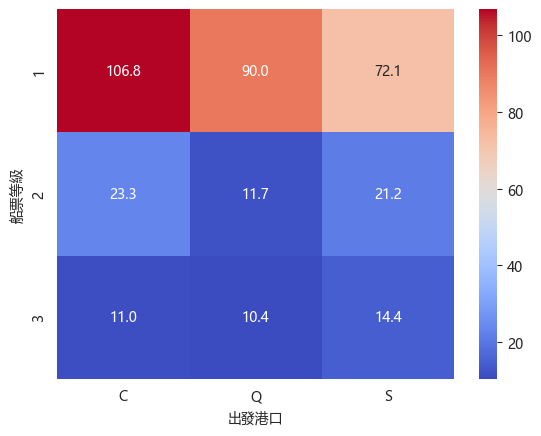

In [49]:
# 畫出上面數據的熱圖
matrix =  data.groupby(['船票等級','出發港口'])['船票價格'].mean().unstack(fill_value=0)
sns.heatmap(matrix, annot=True, cmap='coolwarm', cbar=True, fmt='.1f')
plt.show()

In [ ]:
# 練習題
# 同時用數據跟圖來顯示 性別 與 年齡 之間的關係

In [ ]:
# 練習題
# 年齡 跟 船票價格 之間有關係嗎？

# 找出影響生存率的關鍵欄位

### 船票等級

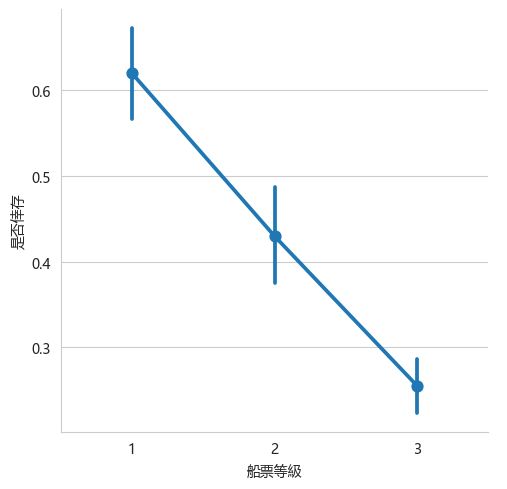

船票等級
1    0.619195
2    0.429603
3    0.255289
Name: 是否倖存, dtype: float64


In [57]:
# 找尋船票等級跟生存之間的關係 
# sns.catplot(data, x="船票等級", y="是否倖存", kind="boxen") # 問題：這個圖不合適，為何？
sns.catplot(data, x="船票等級", y="是否倖存", kind="point")
plt.show()
print(data.groupby("船票等級")['是否倖存'].mean())

### 性別

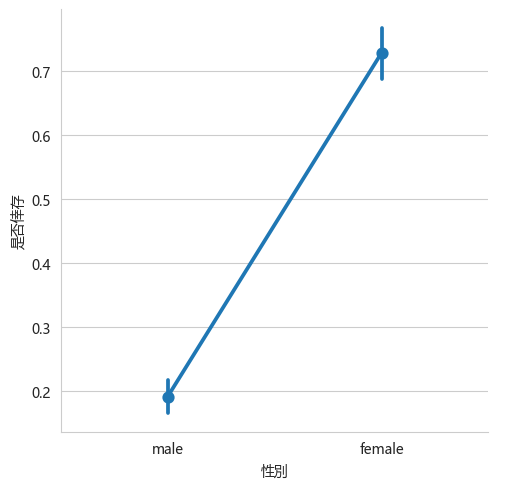

性別
female    0.727468
male      0.190985
Name: 是否倖存, dtype: float64


In [58]:
# 找尋性別跟生存之間的關係 
sns.catplot(data, x="性別", y="是否倖存", kind="point")
plt.show()
print(data.groupby("性別")['是否倖存'].mean())

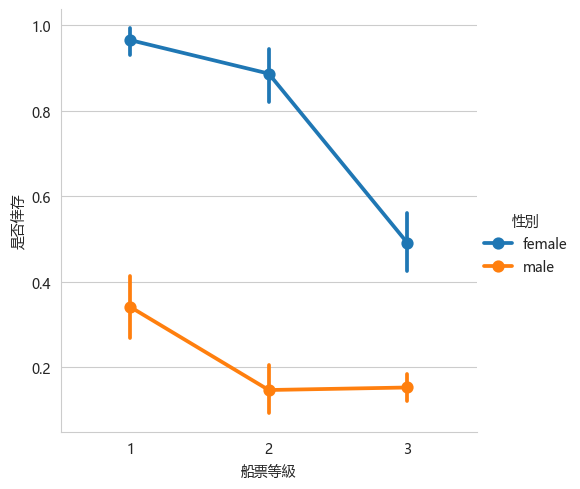

性別      female      male
船票等級                    
1     0.965278  0.340782
2     0.886792  0.146199
3     0.490741  0.152130


In [69]:
# 同時找尋船票等級、性別與生存之間的關係 
sns.catplot(data, x="船票等級", y="是否倖存", kind="point", hue='性別')
plt.show()
print(data.groupby(["船票等級",'性別'])['是否倖存'].mean().unstack())

### 年齡

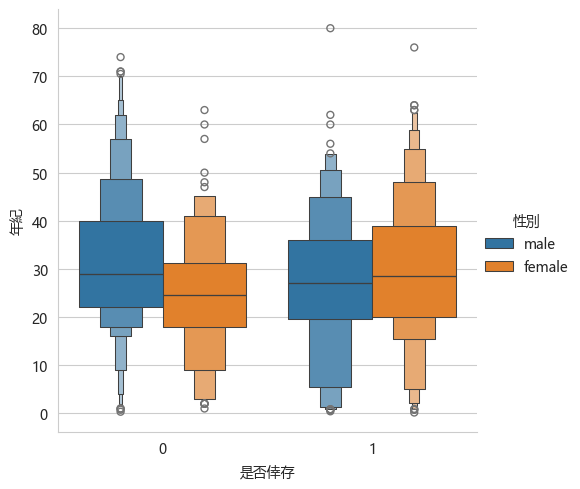

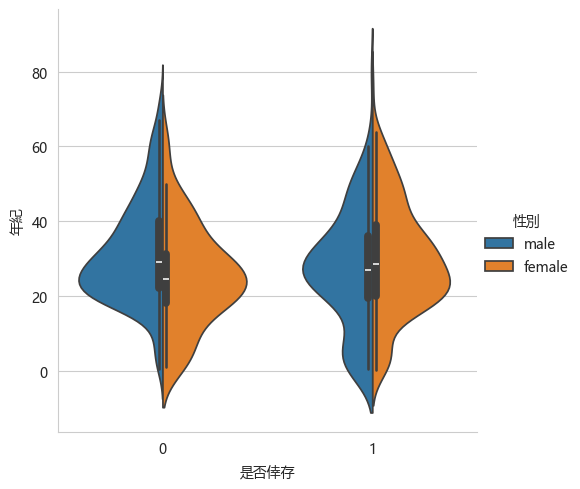

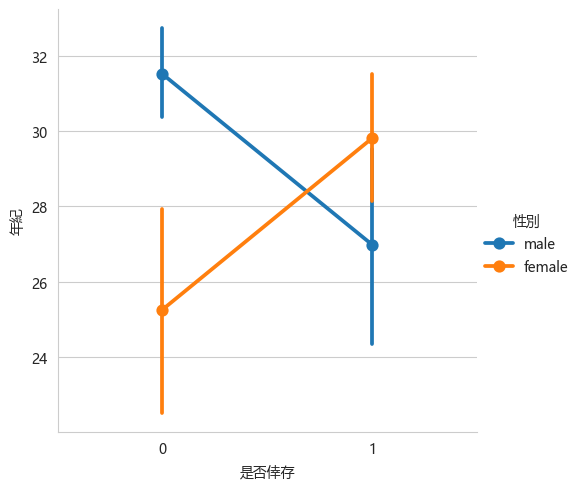

是否倖存
0    30.545363
1    28.918244
Name: 年紀, dtype: float64


In [83]:
# 同時找尋年紀跟生存之間的關係 
# sns.catplot(data, x="年紀", y="是否倖存", kind="point", hue='性別')  # 問題：這個圖不合適，為何？
# sns.catplot(data, x="年紀", y="是否倖存", kind="boxen", hue='性別') # 問題：這個圖不合適，為何？如何改進？
sns.catplot(data, y="年紀", x="是否倖存", kind="boxen", hue='性別') 
sns.catplot(data, y="年紀", x="是否倖存", kind="violin", hue="性別", split=True)
sns.catplot(data, y="年紀", x="是否倖存", kind="point", hue='性別')
plt.show()
print(data.groupby("是否倖存")['年紀'].mean())

In [103]:
# 將年紀分區成 未滿18歲(未成年) , 18~45歲(青年), 45~65歲(中年), 65歲以上(老年)
# 並記錄在一個 "年齡層" 的新欄位中
data['年齡層'] = ""
data.loc[(data['年紀'] < 18), '年齡層'] = '未成年'
data.loc[((data['年紀'] >= 18)&(data['年紀'] < 45)), '年齡層'] = '青年'
data.loc[((data['年紀'] >= 45)&(data['年紀'] < 65)), '年齡層'] = '中年'
data.loc[(data['年紀'] >= 65), '年齡層'] = '老年'

In [104]:
# 分別計算 四個年齡層的 生存率
data.groupby('年齡層')['是否倖存'].mean()

年齡層
       0.277567
中年     0.453988
未成年    0.525974
老年     0.153846
青年     0.377095
Name: 是否倖存, dtype: float64

In [111]:
# 分別計算 四個年齡層的 生存率，同時加入 性別的區分
# data.groupby(['年齡層','性別'])['是否倖存'].mean().reset_index(name='生存率')
data.groupby(['年齡層','性別'])['是否倖存'].mean().unstack()

性別,female,male
年齡層,,
,0.602564,0.140541
中年,0.859375,0.191919
未成年,0.694444,0.378049
老年,1.000000,0.083333
青年,0.741036,0.180645


### 親屬數目
作業

### 船票價格
作業

### 出發港口
作業

### 姓名
作業(加分題)